# Carregamento dos dados
Vamos carregar os dados dos textos das notícias. Essas notícias são referentes ao ano de 2017 e estão distribuídas dentre 6 categorias diferentes, conforme consta na análise preliminar a seguir.

In [223]:
dados_noticias = pd.read_csv('textos.csv', sep=';')
dados_noticias.head(5)

,link,categ,texto
0,http://g1.globo.com/sp/ribeirao-preto-franca/n...,agro,O presidente Michel Temer (PMDB) e o ministro ...
1,http://g1.globo.com/economia/agronegocios/noti...,agro,O presidente Michel Temer desembarca em Ribeir...
2,http://g1.globo.com/economia/agronegocios/noti...,agro,O presidente Michel Temer afirmou nesta segund...
3,http://g1.globo.com/economia/agronegocios/noti...,agro,A produção de açúcar e etanol do centro-sul do...
4,http://g1.globo.com/economia/agronegocios/noti...,agro,Os preços do etanol hidratado nos postos brasi...


In [224]:
dados_noticias.describe()

,link,categ,texto
count,650,650,636
unique,642,6,624
top,http://g1.globo.com/bemestar/noticia/desafio-d...,ciencia-e-saude,A página que você tentou acessar não existe ou...
freq,2,146,5


In [182]:
dados_noticias.loc[0, 'texto']

'O presidente Michel Temer (PMDB) e o ministro interino da Agricultura, Eumar Novacki, confirmaram nesta quinta-feira (19) a liberação de um pré-custeio de R$ 12 bilhões para beneficiar produtores rurais na safra 2017/2018.\n\nO valor da linha de crédito, que já tinha sido antecipado à imprensa esta semana, é 16,5% superior ao anunciado no período anterior, quando foram concedidos R$ 10 bilhões. A taxa de juros, no entanto, também é maior em relação ao que foi concedido um ano antes, ainda no governo Dilma Rousseff, e chega a 9,5% ao ano.\n\n"A agricultura e o agronegócio vão tão bem, são tão sustentadores do país, que só precisa de financiamento. É o que estamos fazendo nesse momento", afirmou Temer durante evento no Instituto Agronômico de Campinas (IAC), em Ribeirão Preto (SP).\n\nDiante de autoridades como o governador de São Paulo, Geraldo Alckmin (PSDB), ele também falou que o \'está começando a sair da recessão\'.\n\nDurante o anúncio, um grupo de 20 manifestantes do Movimento d

# Pré-processamento

<p style="color:blue">Removendo todo e qualquer caracter que não seja latino</p>

In [225]:
import regex # trabalhar com expressões regulares
dados_noticias['texto'] = dados_noticias['texto'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))

In [226]:
dados_noticias.loc[0, 'texto']

'O presidente Michel Temer  PMDB  e o ministro interino da Agricultura  Eumar Novacki  confirmaram nesta quinta feira      a liberação de um pré custeio de R     bilhões para beneficiar produtores rurais na safra             O valor da linha de crédito  que já tinha sido antecipado à imprensa esta semana  é       superior ao anunciado no período anterior  quando foram concedidos R     bilhões  A taxa de juros  no entanto  também é maior em relação ao que foi concedido um ano antes  ainda no governo Dilma Rousseff  e chega a      ao ano    A agricultura e o agronegócio vão tão bem  são tão sustentadores do país  que só precisa de financiamento  É o que estamos fazendo nesse momento   afirmou Temer durante evento no Instituto Agronômico de Campinas  IAC   em Ribeirão Preto  SP    Diante de autoridades como o governador de São Paulo  Geraldo Alckmin  PSDB   ele também falou que o  está começando a sair da recessão    Durante o anúncio  um grupo de    manifestantes do Movimento dos Trabalh

<p style="color:blue">Colocando todos os textos para minúsculo</p>

In [227]:
dados_noticias['texto'] = dados_noticias['texto'].apply(lambda x: str(x).lower())

In [228]:
dados_noticias.loc[0, 'texto']

'o presidente michel temer  pmdb  e o ministro interino da agricultura  eumar novacki  confirmaram nesta quinta feira      a liberação de um pré custeio de r     bilhões para beneficiar produtores rurais na safra             o valor da linha de crédito  que já tinha sido antecipado à imprensa esta semana  é       superior ao anunciado no período anterior  quando foram concedidos r     bilhões  a taxa de juros  no entanto  também é maior em relação ao que foi concedido um ano antes  ainda no governo dilma rousseff  e chega a      ao ano    a agricultura e o agronegócio vão tão bem  são tão sustentadores do país  que só precisa de financiamento  é o que estamos fazendo nesse momento   afirmou temer durante evento no instituto agronômico de campinas  iac   em ribeirão preto  sp    diante de autoridades como o governador de são paulo  geraldo alckmin  psdb   ele também falou que o  está começando a sair da recessão    durante o anúncio  um grupo de    manifestantes do movimento dos trabalh

<p style="color:blue">Vamos definir uma função para remover stopwords mais facilmente no datafreme</p>

In [188]:
import nltk #caso não funcione, adicione a linha nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<p style="color:blue">Vamos remover stopwords usando a função definida acima</p>

In [229]:
dados_noticias['texto'] = dados_noticias['texto'].apply(remove_stopwords)

In [230]:
dados_noticias.loc[0, 'texto']

'presidente michel temer pmdb ministro interino agricultura eumar novacki confirmaram nesta quinta feira liberação pré custeio r bilhões beneficiar produtores rurais safra valor linha crédito sido antecipado imprensa semana superior anunciado período anterior concedidos r bilhões taxa juros entanto maior relação concedido ano antes ainda governo dilma rousseff chega ano agricultura agronegócio vão tão bem tão sustentadores país precisa financiamento fazendo nesse momento afirmou temer durante evento instituto agronômico campinas iac ribeirão preto sp diante autoridades governador paulo geraldo alckmin psdb falou começando sair recessão durante anúncio grupo manifestantes movimento trabalhadores rurais terra mst fez protesto tumulto pré custeio viabilizado meio linha crédito banco brasil pré custeio antecede plano safra previsto ser lançado maio visa auxiliar produtores planejamento aquisição insumos máquinas sementes fertilizantes pesticidas início deste ano projeção ibge aponta produç

# Extração da features (representação de texto em formato vetorial)

<p style="color:blue">A seguir, faremos a instanciação do método que fará a representação do texto usando o modelo Bag of Words visto em aula.</p> 

In [231]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [232]:
BoW_matriz = vectorizer.fit_transform(dados_noticias['texto'])

In [233]:
BOW_dataframe=pd.DataFrame(BoW_matriz.toarray(),columns=vectorizer.get_feature_names())
BOW_dataframe

,ab,abacate,abaixo,abal,abala,abalar,abandona,abandonado,abandonar,abandonou,...,úmido,única,únicas,único,únicos,úteis,útero,útil,útlima,útlimo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
646,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Treinamento e teste

<p style="color:blue">Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (BOW_dataframe) em um conjunto de teste e outro treinamento. </p>

In [234]:
textos_bow = BOW_dataframe
categorias = dados_noticias['categ'] # as categorias devem estar separadas dos dados de treinamento 

In [235]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow, categorias, test_size=0.2) #20% para teste.

# X_train contém os 80% dos dados - treinamento
# y_train contém os 80% das categorias (atributo alvo) - treinamento

# X_test contém os 20% dos dados - teste
# y_test contém os 20% das categorias - teste

In [236]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predicoes = naive_bayes.predict(X_test) # recebe os 20% dos dados de teste sem as categorias - "escondidas"

<p style="color:blue">Como sabemos de antemão a categoria correta do conjunto de teste, vamos avaliar a performance do nosso classificador de notícias Bayesiano</p>

In [237]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicoes))

# y_test contém as categorias conhecidas do conjunto de teste usado no método predict().
# predicoes contém as categorias preditas (retornadas) pelo método predict() com base nos dados de X_test.

                 precision    recall  f1-score   support

           agro       0.88      0.88      0.88        16
ciencia-e-saude       0.82      0.93      0.87        30
       economia       0.76      0.76      0.76        25
       educacao       0.85      0.96      0.90        23
       politica       0.83      0.83      0.83        23
     tecnologia       0.83      0.38      0.53        13

       accuracy                           0.82       130
      macro avg       0.83      0.79      0.79       130
   weighted avg       0.82      0.82      0.81       130



<p style="color:blue">Vamos montar a matriz de confusão usando um mapa de valor da biblioteca Seaborn</p>

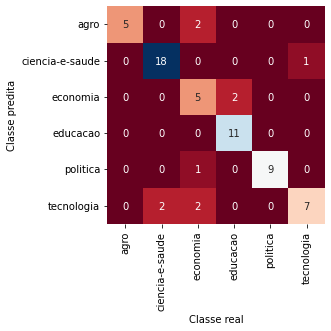

In [195]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, 
            xticklabels=categorias.unique(),
            yticklabels=categorias.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()


# Teste para uma notícia nova

<p style="color: blue">Vamos supor que o classificador acima seja o melhor de todos, isto é, você fez vários testes de pré-processamento e testou diferentes formas de representação de texto (features). Tendo isso em vista, agora vem a parte legal que é testar esse classificador em notícias diferentes de qualquer uma existente na base de treinamento. 
Porém, antes disso, precisamos treinar o classificador em toda a base de notícias que montamos anteriormente. Isso porque nos testes de performance, separamos os dados em treino e teste com a intenção de simular o comportamento do algoritmo. Por isso, vamos treinar o classificador bayesiano em toda a base agora: </p>

In [214]:
naive_bayes = MultinomialNB()
naive_bayes.fit(textos_bow, categorias)

MultinomialNB()

<p style="color: blue">Agora que treinamos o classificador Bayesiano em toda a base, vamos pegar uma notícia totalmente nova do portal G1 cuja categoria exista na nossa base. Lembre-se, nosso modelo classifica em seis categorias distintas:  </p>
    <ul>
        <li>agro
        <li>ciencia e saude
        <li>economia
        <li>educacao
        <li>politica
        <li>tecnologia
    </ul>
 
 <p style="color: blue"> Peguei um notícia da categoria "Economia" e quero ver se o modelo acerta. Através do link da notícia, raspei o texto da web usando o Goose.</p>

In [1]:
categoria_real = 'economia' # observe que a categoria está visível no próprio link
link = 'https://g1.globo.com/economia/imposto-de-renda/2021/noticia/2021/09/30/ir-2021-869302-contribuintes-cairam-na-malha-fina-veja-o-que-fazer-se-voce-e-um-deles.ghtml'

from goose3 import Goose # para baixar o texto da notícia
g = Goose()
noticia = g.extract(link)
noticia = noticia.cleaned_text 
noticia

'Segundo o órgão, foram entregues 36.868.780 declarações este ano. Destas, 869.302 declarações foram retidas em malha – 2,4% do total de documentos entregues.\n\nEntre as declarações retidas, 666.647 são declarações com imposto a restituir; 181.992 com imposto a pagar, e 20.663 com saldo zero.\n\nComo saber se você está na malha fina?\n\nAo realizar a consulta, será informado se há ou não pendências que impeçam o pagamento da restituição, ou seja, se ele caiu na chamada "malha fina" do leão.\n\nPara saber se está na malha fina, os contribuintes também podem acessar o "extrato" do Imposto de Renda no site da Receita Federal no chamado e-CAC (Centro Virtual de Atendimento).\n\nPara acessar o extrato do IR é necessário utilizar o código de acesso gerado na própria página da Receita Federal, ou certificado digital emitido por autoridade habilitada.\n\nAs restituições de declarações que apresentam inconsistência (em situação de malha) são liberadas apenas depois de corrigidas pelo cidadão, 

<p style="color:blue">Vamos agora aplicar algumas etapas de pré-processamento: retirar caracteres indesejados, passar tudo para minúsculo e remover stopwords.</p>

In [217]:
noticia_SohTexto = regex.sub('[^\p{Latin}]', u' ', noticia)
noticia_lower = noticia.lower()
noticia_semStops = remove_stopwords(noticia_lower)

<p style="color:blue">Pronto, agora precisamos representar esse texto no mesmo modelo de representação que usamos para treinar o classificador. Nesse caso, foi o BoW. Vamos usar a função transform() pertencente ao objeto vectorizer que será responsável por adequar o texto da notícia que queremos classificar à representação criada para o treinamento que construímos usando o método fit_transform. </p>

In [218]:
# O método transform espera algum iterável, isto é, alguma estrutura de dados. Por isso, passei a notícia dentro de uma lista
noticia_BoW = vectorizer.transform([noticia_semStops])

<p style="color:blue">Finalmente, chamamou o método predict que determinará a classe dessa notícia! </p>

In [222]:
categoria_predita = naive_bayes.predict(noticia_BoW)
print('A classe predita para essa notícia é: ', categoria_predita);
print('A classe real dessa noticia é: ', categoria_real)

A classe predita para essa notícia é:  ['economia']
A classe real dessa noticia é:  economia


<p style="color:blue">Olha só que legal, o modelo acertou a categoria! </p>